In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import gamma  # ガンマ関数
%matplotlib inline

In [11]:
plt.style.use("ggplot")
np.random.seed(123)

In [16]:
# 次元の呪いにより、高次元の場合、モンテカルロの解と解析解が一致しなくなる
# 次元上がるとランダムに点を打つだけでは成立しないことわかる
accept_dict = {}
NMCS = 40000  # サンプル数
Ndim = 15  # 次元数
for ii in range(Ndim):
    print(f"\n---- dim={ii}----")
    accept = 0  # 初期化
    for i in range(NMCS):
        x = 2 * np.random.rand(ii) - 1.0  # 座標
        r = (np.sum(x**2)) ** 0.5  # 距離
        if r <= 1:
            accept += 1  # 棄却サンプリング
    accept_ratio = accept / NMCS  # 受容確率
    analytical = np.pi **(ii/2.0) / (2 ** ii * gamma(ii / 2 + 1))  # N次元の級の体積=解析解
    print("accept ratio: ", accept_ratio)  # モンテカルロで出した結果
    print("analytical solution: ", analytical)  # 解析解
    accept_dict.update({ii:accept_ratio / analytical})


---- dim=0----
accept ratio:  1.0
analytical solution:  1.0

---- dim=1----
accept ratio:  1.0
analytical solution:  1.0

---- dim=2----
accept ratio:  0.78495
analytical solution:  0.7853981633974483

---- dim=3----
accept ratio:  0.521325
analytical solution:  0.5235987755982989

---- dim=4----
accept ratio:  0.315875
analytical solution:  0.30842513753404244

---- dim=5----
accept ratio:  0.165275
analytical solution:  0.16449340668482262

---- dim=6----
accept ratio:  0.08065
analytical solution:  0.08074551218828077

---- dim=7----
accept ratio:  0.036
analytical solution:  0.03691223414321407

---- dim=8----
accept ratio:  0.0161
analytical solution:  0.0158543442438155

---- dim=9----
accept ratio:  0.006175
analytical solution:  0.006442400200661536

---- dim=10----
accept ratio:  0.002625
analytical solution:  0.00249039457019272

---- dim=11----
accept ratio:  0.00085
analytical solution:  0.0009199725973583495

---- dim=12----
accept ratio:  0.00035
analytical solution:  0.

Text(0, 0.5, 'ratio[-]')

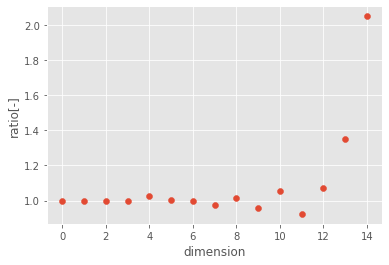

In [17]:
df = pd.DataFrame.from_dict(accept_dict, orient="index")
plt.scatter(df.index,df[0])
plt.xlabel("dimension")
plt.ylabel("ratio[-]")